# About NetCDF4

NetCDF4 is file format for multidimensional arrays and based on HDF5.

Easier to work with large datasets having labeled dimensions and coordinate variables.

http://www.unidata.ucar.edu/software/netcdf/docs/faq.html#What-Is-netCDF

NetCDF4 can also be used without *xarray*:

https://github.com/Unidata/netcdf4-python


# Using NetCDF4 through *xarray*

Package *xarray*: 

> provides pandas like interface to multidimensional arrays with labled coordinates
> saves arrays in NetCDF4 format
> 
>  http://xarray.pydata.org/en/stable/
>
> `xarray.Dataset` objects are in-memory represenations of NetCDF4 files.

Package *pandas* 

> - only feasible here for 2d tables (`pandas.DataFrame`), 
    they will drop support for `pandas.Panel` object.
> - provides methods to convert to and from `xarray.Dataset`.


# Installation

Conda:

     conda install xarray
     conda install netcdf4
     
If you want to use NetCDF4, you need to install it explicitly!

In [7]:
import pandas as pd
df = pd.read_hdf('example-pandas.h5', 'yahoo', mode='r')

In [10]:
ds = df.to_xarray()

In [11]:
ds

<xarray.Dataset>
Dimensions:    (Date: 771)
Coordinates:
  * Date       (Date) datetime64[ns] 2010-01-04 2010-01-05 2010-01-06 ...
Data variables:
    Open       (Date) float64 10.17 10.45 11.21 11.46 11.67 11.9 11.98 11.91 ...
    High       (Date) float64 10.28 11.24 11.46 11.69 11.74 12.14 12.03 ...
    Low        (Date) float64 10.05 10.4 11.13 11.32 11.46 11.78 11.72 11.47 ...
    Close      (Date) float64 10.28 10.96 11.37 11.66 11.69 12.11 11.87 ...
    Volume     (Date) int64 60855800 215620200 200070600 130201700 130463000 ...
    Adj Close  (Date) float64 8.419 8.976 9.311 9.549 9.573 9.917 9.721 ...

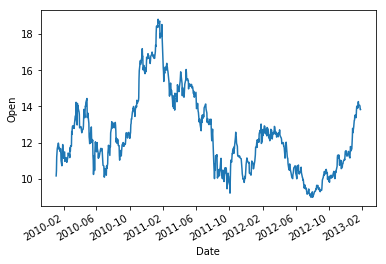

In [14]:
%matplotlib inline
ds.Open.plot()

In [18]:
ds.to_netcdf("example-xarray.h5", group="yahoo")

# Another example showing two coordinates

In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns # pandas aware plotting library

np.random.seed(123)

times = pd.date_range('2000-01-01', '2001-12-31', name='time')
annual_cycle = np.sin(2 * np.pi * (times.dayofyear / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset({'tmin': (('time', 'location'), tmin_values),
                 'tmax': (('time', 'location'), tmax_values)},
                {'time': times, 'location': ['IA', 'IN', 'IL']})

In [20]:
ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 ...
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 -9.341 -6.558 ...
    tmax      (time, location) float64 12.98 3.31 6.779 0.4479 6.373 4.843 ...

In [23]:
ds.to_netcdf("example-xarray.h5", group="weather", mode='a')

RuntimeError: NetCDF: String match to name in use

# Conclusion

- much more natural way to deal with multidimensional arrays including 
  scaled and labeled dimensions
- good, if you want to process multidimensional arrays in chunks
- not possible to append to exisiting data
- no indexed search (?)

